# CWordTM Usage on the Holy Bible (CUV)

This Jupyter notebook demonstrates how to use the package "CWordTM" on the Holy Bible (Chinese Union Version - Traditional Chinese):

1. Utility Features
1. Text Visualization - Word Cloud
1. Text Summarization
1. Pivot Table
1. OT Quotes
1. Topic Modeling - LDA and BERTopic

In [1]:
# Import the Package CWordTM
import cwordtm
from cwordtm import *

## 1. Utility Features

In [2]:
# Load the whole Bible
bible = "cuv.csv"
cdf = util.load_word(bible, info=True)

Loading file 'C:\Dev\Anaconda3\envs\aiml\lib\site-packages\cwordtm\data\cuv.csv' ...

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31102 entries, 0 to 31101
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   book       31102 non-null  object
 1   book_no    31102 non-null  int64 
 2   chapter    31102 non-null  int64 
 3   verse      31102 non-null  int64 
 4   text       31102 non-null  object
 5   testament  31102 non-null  int64 
 6   category   31102 non-null  object
 7   cat        31102 non-null  object
 8   cat_no     31102 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 2.1+ MB


### Extract Partial Scripture

In [3]:
# Extract OT Scripture
otdf = util.extract(cdf, testament=0)
otdf.head()

book  book_no  chapter  verse                        text  testament  \
0  Gen        1        1      1                   起初　神創造天地。          0   
1  Gen        1        1      2     地是空虛混沌．淵面黑暗．　神的靈運行在水面上。          0   
2  Gen        1        1      3               　神說、要有光、就有了光。          0   
3  Gen        1        1      4            　神看光是好的、就把光暗分開了。          0   
4  Gen        1        1      5  　神稱光為晝、稱暗為夜．有晚上、有早晨、這是頭一日。          0   

  category  cat  cat_no  
0    Torah  tor       0  
1    Torah  tor       0  
2    Torah  tor       0  
3    Torah  tor       0  
4    Torah  tor       0

In [4]:
# Extract Gospels (The first four book in NT)
gos = util.extract(cdf, category='gos')
gos.head()

book  book_no  chapter  verse                                  text  \
23145  Mat       40        1      1  亞伯拉罕的後裔、大衛的子孫、耶穌基督的家譜．〔後裔子孫原文都作兒子下同〕   
23146  Mat       40        1      2             亞伯拉罕生以撒．以撒生雅各．雅各生猶大和他的弟兄．   
23147  Mat       40        1      3         猶大從他瑪氏生法勒斯和謝拉．法勒斯生希斯崙．希斯崙生亞蘭．   
23148  Mat       40        1      4                亞蘭生亞米拿達．亞米拿達生拿順．拿順生撒門．   
23149  Mat       40        1      5        撒門從喇合氏生波阿斯．波阿斯從路得氏生俄備得．俄備得生耶西．   

       testament category  cat  cat_no  
23145          1   Gospel  gos       5  
23146          1   Gospel  gos       5  
23147          1   Gospel  gos       5  
23148          1   Gospel  gos       5  
23149          1   Gospel  gos       5

In [5]:
# Extract the Book of Romans
rom = util.extract(cdf, book='Rom')
rom.head()

book  book_no  chapter  verse                              text  \
27930  Rom       45        1      1         耶穌基督的僕人保羅、奉召為使徒、特派傳　神的福音．   
27931  Rom       45        1      2            這福音是　神從前藉眾先知、在聖經上所應許的、   
27932  Rom       45        1      3        論到他兒子我主耶穌基督．按肉體說、是從大衛後裔生的、   
27933  Rom       45        1      4        按聖善的靈說、因從死裡復活、以大能顯明是　神的兒子。   
27934  Rom       45        1      5  我們從他受了恩惠、並使徒的職分、在萬國之中叫人為他的名信服真道．   

       testament          category  cat  cat_no  
27930          1  Pauline Epistles  pau       7  
27931          1  Pauline Epistles  pau       7  
27932          1  Pauline Epistles  pau       7  
27933          1  Pauline Epistles  pau       7  
27934          1  Pauline Epistles  pau       7

In [6]:
# Extract Verse 28 of Chapter 8 of Romans
rom8_28 = util.extract(cdf, book='Rom', chapter=8, verse=28)
rom8_28.text

28143    我們曉得萬事都互相效力、叫愛　神的人得益處、就是按他旨意被召的人。
Name: text, dtype: object

In [7]:
# Another way to extract Rom 8:28
rom8_28 = util.extract2(cdf, filter='Rom 8:28')
rom8_28.text

28143    我們曉得萬事都互相效力、叫愛　神的人得益處、就是按他旨意被召的人。
Name: text, dtype: object

In [8]:
# Extract Rom 8:1~10
rom8_1_10 = util.extract2(cdf, filter='Rom 8:1-10')
list(rom8_1_10.text)

['如今那些在基督耶穌裡的、就不定罪了。',
 '因為賜生命聖靈的律、在基督耶穌裡釋放了我、使我脫離罪和死的律了。',
 '律法既因肉體軟弱、有所不能行的、\u3000神就差遣自己的兒子、成為罪身的形狀、作了贖罪祭、在肉體中定了罪案．',
 '使律法的義、成就在我們這不隨從肉體、只隨從聖靈的人身上。',
 '因為隨從肉體的人、體貼肉體的事．隨從聖靈的人、體貼聖靈的事。',
 '體貼肉體的就是死．體貼聖靈的乃是生命平安．',
 '原來體貼肉體的、就是與\u3000神為仇．因為不服\u3000神的律法、也是不能服。',
 '而且屬肉體的人、不能得\u3000神的喜歡。',
 '如果\u3000神的靈住在你們心裡、你們就不屬肉體、乃屬聖靈了．人若沒有基督的靈、就不是屬基督的。',
 '基督若在你們心裡、身體就因罪而死、心靈卻因義而活．']

## 2. Text Visualization -  Word Cloud

In [9]:
# Extract the NT Scripture for Word Cloud
text_list = util.get_text_list(cdf[cdf.testament==1])   # load New Testament Scripture
text_list[:10]

['亞伯拉罕的後裔、大衛的子孫、耶穌基督的家譜．〔後裔子孫原文都作兒子下同〕',
 '亞伯拉罕生以撒．以撒生雅各．雅各生猶大和他的弟兄．',
 '猶大從他瑪氏生法勒斯和謝拉．法勒斯生希斯崙．希斯崙生亞蘭．',
 '亞蘭生亞米拿達．亞米拿達生拿順．拿順生撒門．',
 '撒門從喇合氏生波阿斯．波阿斯從路得氏生俄備得．俄備得生耶西．',
 '耶西生大衛王。大衛從烏利亞的妻子生所羅門．',
 '所羅門生羅波安．羅波安生亞比雅．亞比雅生亞撒．',
 '亞撒生約沙法．約沙法生約蘭．約蘭生烏西亞．',
 '烏西亞生約坦．約坦生亞哈斯．亞哈斯生希西家．',
 '希西家生瑪拿西．瑪拿西生亞們．亞們生約西亞．']

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache


Loading Chinese vocabulary 'C:\Dev\Anaconda3\envs\aiml\lib\site-packages\cwordtm\data\bible_vocab.txt' ...


Loading model cost 1.507 seconds.
Prefix dict has been built successfully.
Building prefix dict from C:\Dev\Anaconda3\envs\aiml\lib\site-packages\cwordtm\dictionary\dict.txt.big.txt ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.ufaf52121053d30f6b6740fa1422773b4.cache
Loading model cost 2.556 seconds.
Prefix dict has been built successfully.
C:\Dev\Anaconda3\envs\aiml\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


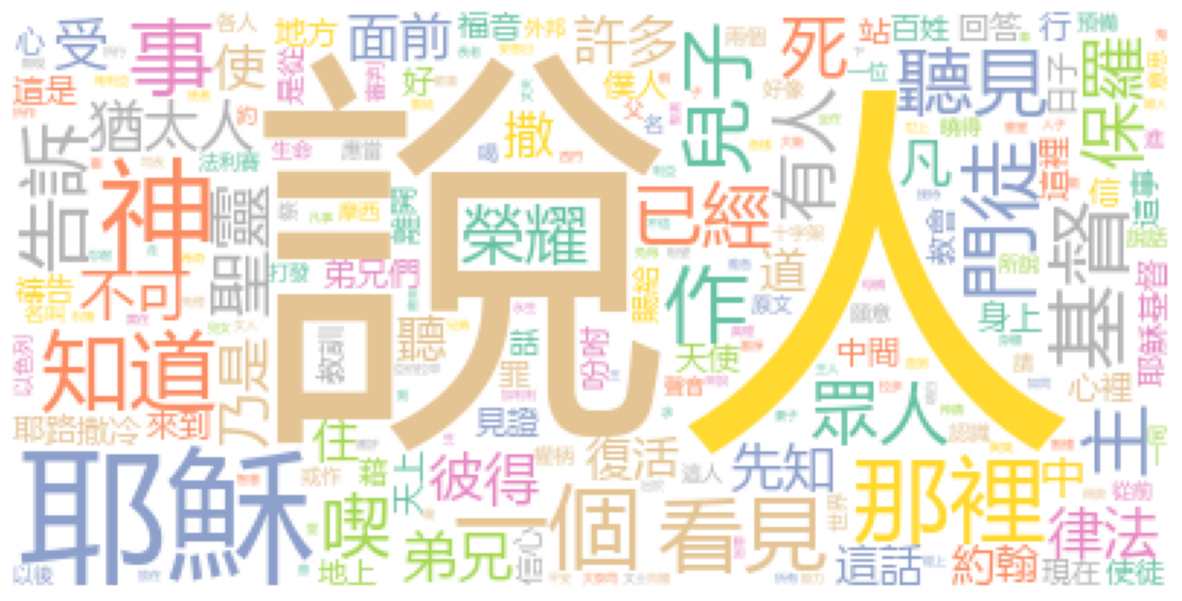

In [10]:
# White background with no image mask
viz.chi_wordcloud(text_list)

Building prefix dict from C:\Dev\Anaconda3\envs\aiml\lib\site-packages\cwordtm\dictionary\dict.txt.big.txt ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.ufaf52121053d30f6b6740fa1422773b4.cache


Loading Chinese vocabulary 'C:\Dev\Anaconda3\envs\aiml\lib\site-packages\cwordtm\data\bible_vocab.txt' ...


Loading model cost 2.657 seconds.
Prefix dict has been built successfully.
C:\Dev\Anaconda3\envs\aiml\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


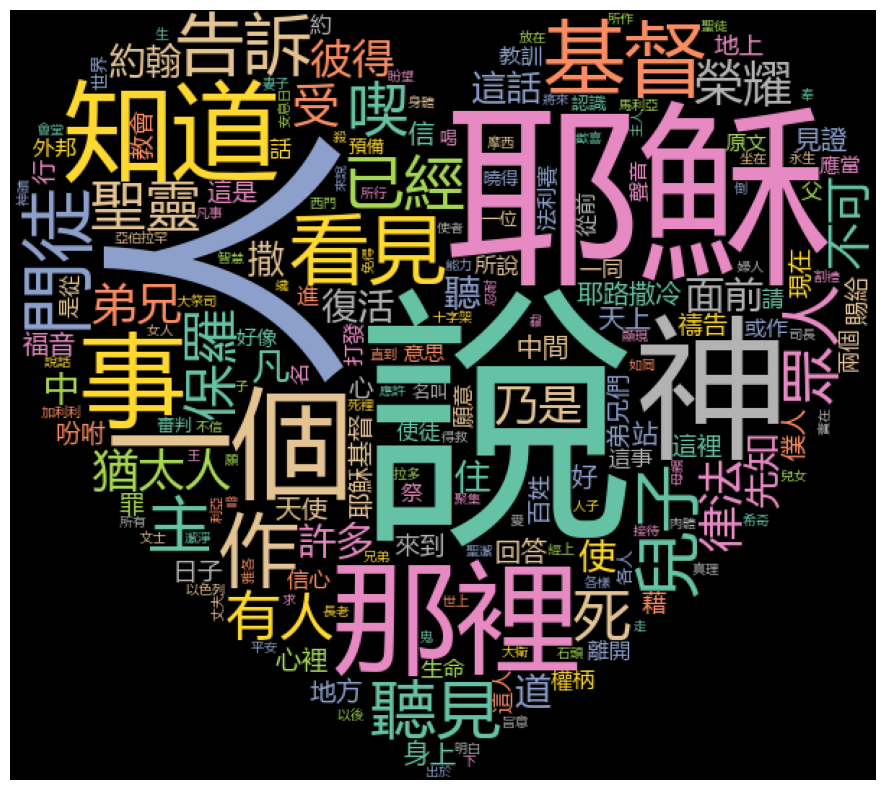

In [11]:
# Use internal image mask
viz.chi_wordcloud(text_list, bg='black', image=1)

## 3. Text Summarization

In [12]:
# Extract and summarize Chapter 8 of Romans
rom8 = util.extract2(cdf, 'Rom 8')
ta.summary(rom8, lang='chi')

Building prefix dict from C:\Dev\Anaconda3\envs\aiml\lib\site-packages\cwordtm\dictionary\dict.txt.big.txt ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.ufaf52121053d30f6b6740fa1422773b4.cache


Loading Chinese vocabulary 'C:\Dev\Anaconda3\envs\aiml\lib\site-packages\cwordtm\data\bible_vocab.txt' ...


Loading model cost 2.568 seconds.
Prefix dict has been built successfully.


['因為隨從肉體的人、體貼肉體的事．隨從聖靈的人、體貼聖靈的事',
 '而且屬肉體的人、不能得神的喜歡',
 '如果神的靈住在你們心裡、你們就不屬肉體、乃屬聖靈了．人若沒有基督的靈、就不是屬基督的']

## 4. Pivot Table

### Show Bible Scripture Statistics through a Pivot Table

In [13]:
pivot.stat(cdf, chi=True)

chapter  verse     text
category         book_no book                         
Torah            1       Gen        50   1533    51460
                 2       Exo        40   1213    40057
                 3       Lev        27    859    29228
                 4       Num        36   1288    41654
                 5       Deu        34    959    35904
...                                ...    ...      ...
General Epistles 65      Jud         1     25     1030
Sub-Total                           34    735    25960
Apocalypse       66      Rev        22    404    15606
Sub-Total                           22    404    15606
                 Total            1189  31102  1062163

[77 rows x 3 columns]

## 5. OT Quotes

### Identify Cited Sources in OT Scripture for some NT verses

In [14]:
rom10 = util.extract2(cdf, 'Rom 10')
quot.show_quot(rom10, lang='chi')

Loading Chinese vocabulary 'C:\Dev\Anaconda3\envs\aiml\lib\site-packages\cwordtm\data\bible_vocab.txt' ...
Loading file 'C:\Dev\Anaconda3\envs\aiml\lib\site-packages\cwordtm\data\cuv.csv' ...


Building prefix dict from C:\Dev\Anaconda3\envs\aiml\lib\site-packages\cwordtm\dictionary\dict.txt.big.txt ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.ufaf52121053d30f6b6740fa1422773b4.cache


Loading file 'C:\Dev\Anaconda3\envs\aiml\lib\site-packages\cwordtm\data\book_categories.csv' ...
( 1) 羅 10:5 摩西寫著說、『人若行那出於律法的義、就必因此活著。』


Loading model cost 2.549 seconds.
Prefix dict has been built successfully.


( 2) 羅 10:6 惟有出於信心的義如此說、『你不要心裡說、誰要升到天上去呢．就是要領下基督來．
( 3) 羅 10:8 他到底怎麼說呢．他說、『這道離你不遠、正在你口裡、在你心裡。』就是我們所傳信主的道。
( 4) 羅 10:11 經上說、『凡信他的人、必不至於羞愧。』
( 5) 羅 10:13 因為『凡求告主名的、就必得救。』
( 6) 羅 10:15 若沒有奉差遣、怎能傳道呢．如經上所記、『報福音傳喜信的人、他們的腳蹤何等佳美。』
( 7) 羅 10:16 只是人沒有都聽從福音．因為以賽亞說、『主阿、我們所傳的有誰信呢。』
     -> 0.6723 賽 53:1    我們所傳的、〔或作所傳與我們的〕有誰信呢．耶和華的膀臂向誰顯露呢。
( 8) 羅 10:18 但我說、人沒有聽見麼．誠然聽見了．『他們的聲音傳遍天下、他們的言語傳到地極。』
( 9) 羅 10:19 我再說、以色列人不知道麼．先有摩西說、『我要用那不成子民的、惹動你們的憤恨．我要用那無知的民、觸動你們的怒氣。』
     -> 0.5403 申 32:21   他們以那不算為神的、觸動我的憤恨、以虛無的神、惹了我的怒氣、我也要以那不成子民的、觸動他們的憤恨、以愚昧的國民、惹了他們的怒氣。
(10) 羅 10:20 又有以賽亞放膽說、『沒有尋找我的、我叫他們遇見．沒有訪問我的、我向他們顯現。』
     -> 0.6651 賽 65:1    素來沒有訪問我的、現在求問我．沒有尋找我的、我叫他們遇見．沒有稱為我名下的、我對他們說、我在這裡、我在這裡。
(11) 羅 10:21 至於以色列人、他說、『我整天伸手招呼那悖逆頂嘴的百姓。』
     -> 0.6086 賽 65:2    我整天伸手招呼那悖逆的百姓、他們隨自己的意念行不善之道．


## 6. Topic Modeling

### LDA Model

In [15]:
# Build an LDA Model on the NT Scripture
bible = "cuv.csv"
lda = tm.lda_process(bible, cat=2, chi=True, eval=True)

Loading Bible 'C:\Dev\Anaconda3\envs\aiml\lib\site-packages\cwordtm\data\cuv.csv' ...
Corpus loaded!
Text preprocessed!
Text trained!
If no visualization is shown,
  you may execute the following commands to show the visualization:
    > import pyLDAvis
    > pyLDAvis.display(lda.vis_data)
Visualization prepared!

Topics from LDA Model:
[(0,
  '0.044*"兒子" + 0.024*"說" + 0.016*"耶穌" + 0.014*"約翰" + 0.005*"約瑟" + 0.004*"魔鬼" '
  '+ 0.004*"門徒" + 0.004*"加利利" + 0.003*"地方" + 0.003*"約但"'),
 (1,
  '0.026*"神" + 0.018*"基督" + 0.009*"沒有" + 0.009*"事" + 0.008*"知道" + 0.008*"主" + '
  '0.008*"作" + 0.007*"死" + 0.007*"耶穌基督" + 0.007*"說"'),
 (2,
  '0.044*"說" + 0.038*"耶穌" + 0.009*"沒有" + 0.009*"一個" + 0.008*"眾人" + 0.007*"猶太人" '
  '+ 0.007*"事" + 0.007*"門徒" + 0.006*"看見" + 0.006*"聽見"'),
 (3,
  '0.008*"說" + 0.007*"獸" + 0.006*"行為" + 0.006*"基督" + 0.006*"信心" + 0.005*"一個" + '
  '0.005*"作" + 0.005*"帳幕" + 0.005*"神" + 0.004*"血"'),
 (4,
  '0.040*"說" + 0.014*"耶穌" + 0.010*"沒有" + 0.008*"一個" + 0.007*"聽" + 0.007*"看見" + '
  '0.006*

In [16]:
# Show LDA Model Visualization
import pyLDAvis
pyLDAvis.display(lda.vis_data)

### BERTopic Model

In [17]:
# Build a BERTopic Model on the NT Scripture
btm = tm.btm_process(bible, cat=2, chi=True, eval=True)

Loading Bible 'C:\Dev\Anaconda3\envs\aiml\lib\site-packages\cwordtm\data\cuv.csv' ...
Corpus loaded!
Chinese text preprocessed!
Text trained!

Topics from BERTopic Model:
Topic 0: 基督 | 沒有 | 知道 | 律法 | 耶穌基督 | 耶穌 | 聖靈 | 不可 | 福音 | 乃是
Topic 2: 耶穌 | 看見 | 門徒 | 一個 | 沒有 | 告訴 | 天使 | 聽見 | 知道 | 天上
Topic 1: 耶穌 | 保羅 | 一個 | 猶太人 | 門徒 | 彼拉多 | 沒有 | 眾人 | 看見 | 聽見

Model Evaluation Scores:
  Coherence: 0.3555416227153622

BERTopic Model Visualization:
** No Intertopic Distance Map shown for your text!


  If no visualization is shown,
    you may execute the following commands one-by-one:
      btm.model.visualize_topics()
      btm.model.visualize_barchart()
      btm.model.visualize_heatmap()

